## **Jobsheet 4: Klasifikasi**

### **Praktikum 1 - Klasifikasi SVM dengan Data Dummy**

In [53]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Proses import library numpy, matplotlib.pyplotm scipy, seaborn

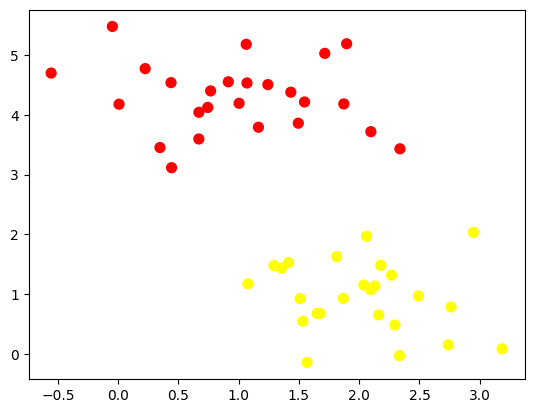

In [54]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Kode ini berfungsi untuk membuat data dummy sebanyak 50 sample dan menampilkannya menggunakan plt.scatter

(-1.0, 3.5)

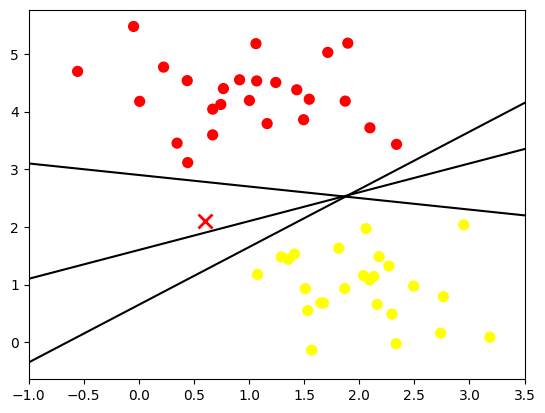

In [55]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Tahap ini bertujuan untuk mengklasifikasikan data dummy menjadi dua kelas menggunakan garis pemisah

(-1.0, 3.5)

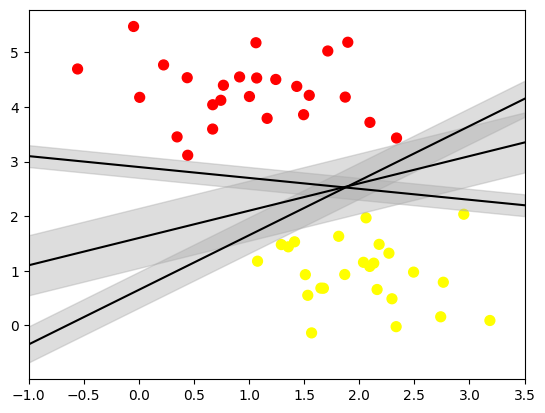

In [56]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Tahap ini hanya memperjelas batasan antar garis

##### **Penerapan fitting SVM**

In [57]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

```python
model = SVC(kernel='linear', C=1E10)
```
Maksud dari kode ini adalah instansiasi model SVC dengan activation linear, kemudian proses fitting dilakukan dengan feature dan targetnya adalah variabel X dan y. Pada praktikum ini tidak dilakukan splitting data terlebih dahulu

In [58]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

fungsi untuk menampilkan fitting data

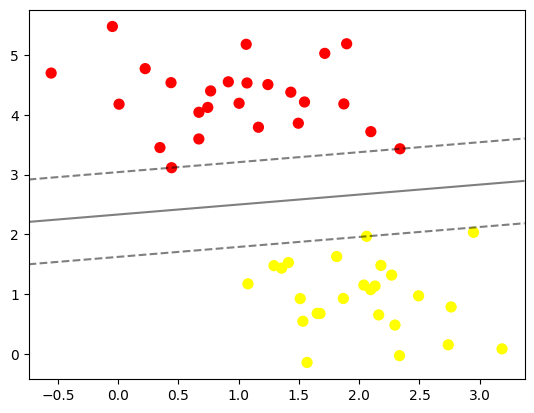

In [59]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

menampilkan plot fitting data

In [60]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

menampilkan data dari semua support vector

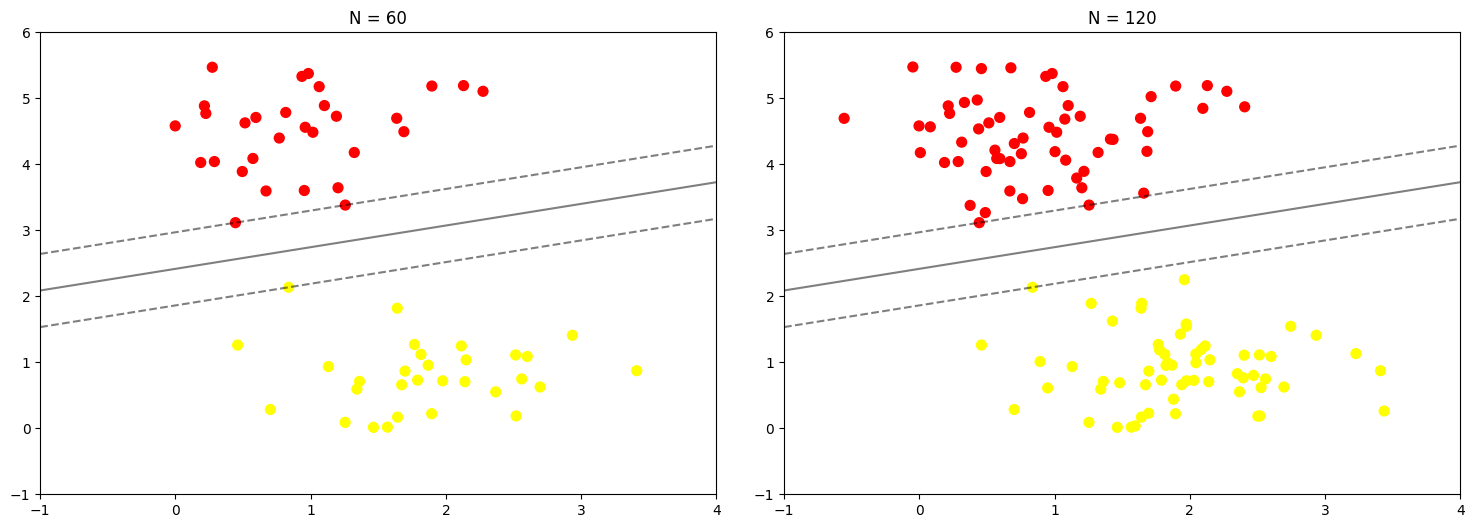

In [61]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

perbandingan antara plot dengan data berjumlah 60 dan 120, tidak ada data yang melebihi garis batas meskipun jumlah datanya dinaikkan 2 kali lipat

##### **Data Tidak Terpisah Secara Linier**

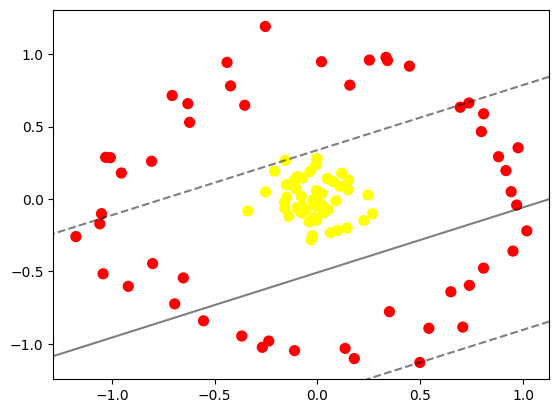

In [62]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

menunjukkan bagaimana performa SVC dengan activation/kernel linear ketika digunakan untuk mengklasifikasikan data yang tidak linier

In [63]:
r = np.exp(-(X ** 2).sum(1))

variabel radial untuk data yang benduk lingkaran seperti di atas

In [64]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed # import tambahan untuk mengatasi error

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.33870546, -0.08268271],
       [-0.02426687, -0.25346099],
       [-0.03675148,  0.18792037],
       [ 0.07549889,  0.11934873],
       [-0.0171345 , -0.12792751],
       [-0.02360853, -0.0101328 ],
       [-0.08066792, -0.09494671],
       [-0.95390765,  0.17905009],
       [ 0.24515799,  0.02774824],
       [ 0.02152647,  0.03821047],
       [ 0.11789036,  0.17748387],
       [ 0.17933488, -1.10244579],
       [ 0.26861868, -0.10191321],
       [-1.050671  , -0.10202947],
       [-0.09952386, -0.05898404],
       [ 0.14832851,  0.06410858],
       [ 0.0297797 , -0.09775801],
       [-0.15131152,  0.09724929],
       [-0.11368333,  0.12594094],
       [-0.00400314,  0.27877254],
       [-0.63058043,  0.65786369],
       [ 0.54226365, -0.89348126],
       [ 0.44770919,  0.91729706],
       [-0.03957757, -0.15837246],
       [-0.92019601, -0.60352865],
       [ 0.49821869, -1.12943645],
       [-0.03095923, -0.28330935],
       [

Visualisasi 3D karena proyeksi radial tidak cukup jika menggunakan model 2D

In [65]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Instansiasi SVC dengan activation/kernel radial basis function (rbf)

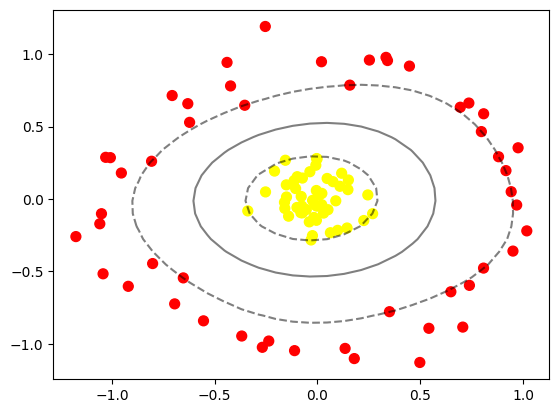

In [66]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

Hasil klasifikasi menggunakan kernel rbf

##### **Data Overlap**

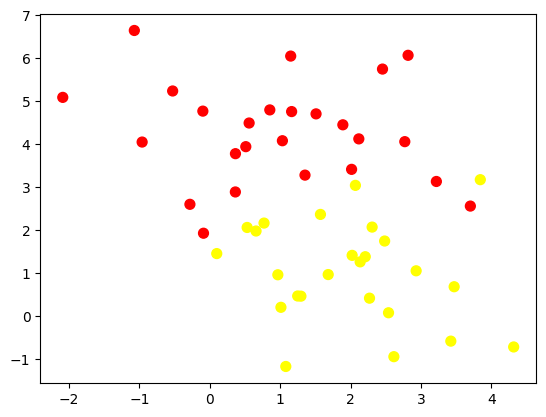

In [67]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Adanya data overlap dimana ada titik kuning yang berada di area titik merah

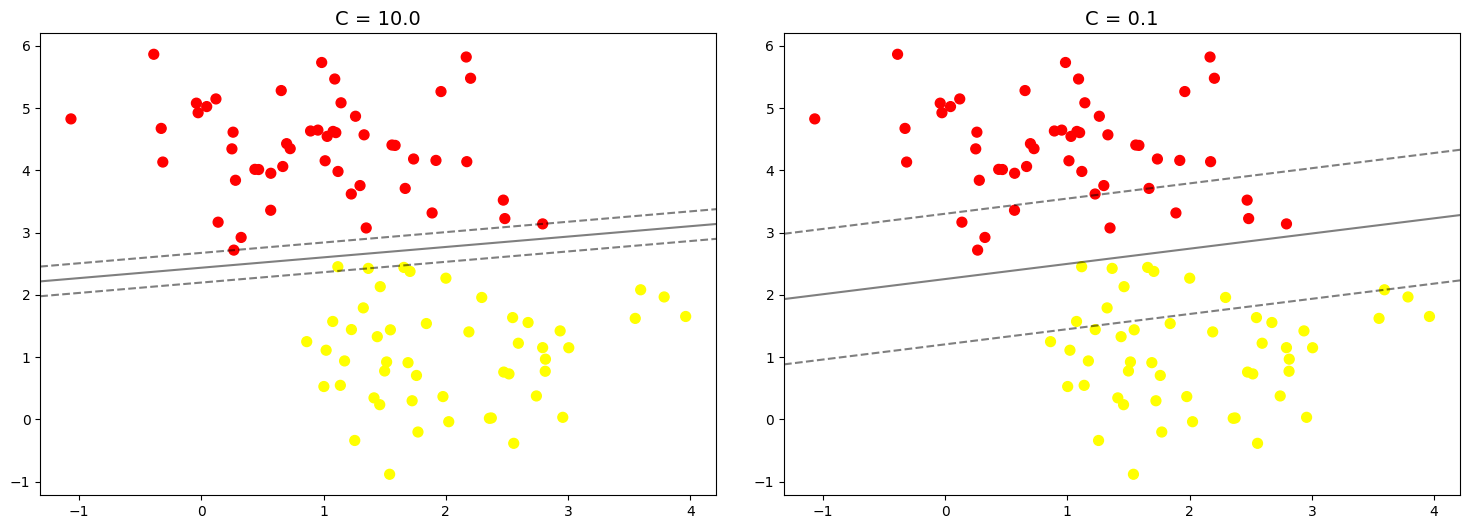

In [68]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Hasil setelah dilakukan parameter tuning

<hr>

### **Praktikum 2 - Klasifikasi SVM Pada Data Citra**

In [69]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi']
4
(820, 62, 47)


Proses load data dari datasets fetch_lfw_people, ditampilkan target (y) dari data tersebut, panjang target, dan dimensi dari faces.images

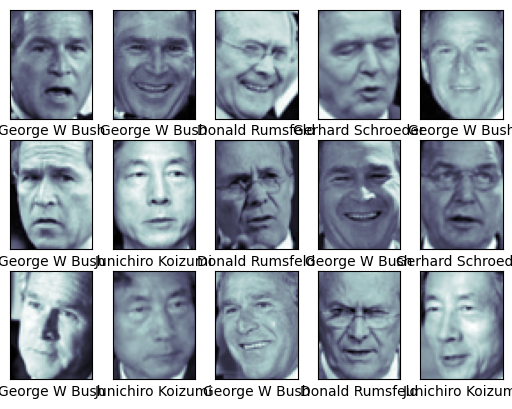

In [70]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Menampilkan contoh wajah dari data fetch_lfw_people

In [71]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Proses pembuatan model dari PCA dan SVC yang digabungkan menggunakan pipeline

In [72]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

splitting data dengan sumber faces.data sebagai feature (x) dan faces.target sebagai target (y)

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: total: 37.8 s
Wall time: 21.5 s
{'svc__C': 1, 'svc__gamma': 0.005}
0.8861788617886178


Proses hyperparameter tuning menggunakan GridSearchCV untuk model SVM di dalam pipeline

In [74]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Proses prediksi data test

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

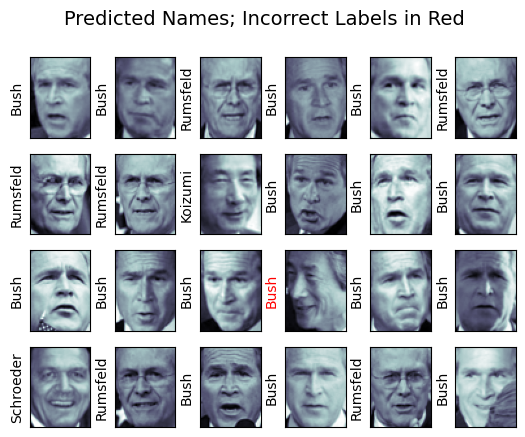

In [75]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Hasil prediksi data test dengan 1 kesalahan pelabelan

In [76]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

  Donald Rumsfeld       0.97      0.81      0.88        36
    George W Bush       0.89      0.99      0.94       128
Gerhard Schroeder       0.92      0.86      0.89        28
Junichiro Koizumi       1.00      0.46      0.63        13

         accuracy                           0.91       205
        macro avg       0.94      0.78      0.83       205
     weighted avg       0.91      0.91      0.90       205



Menunjukkan laporan evaluasi performa model klasifikasi dengan data test dan data prediksi

Text(113.92222222222219, 0.5, 'predicted label')

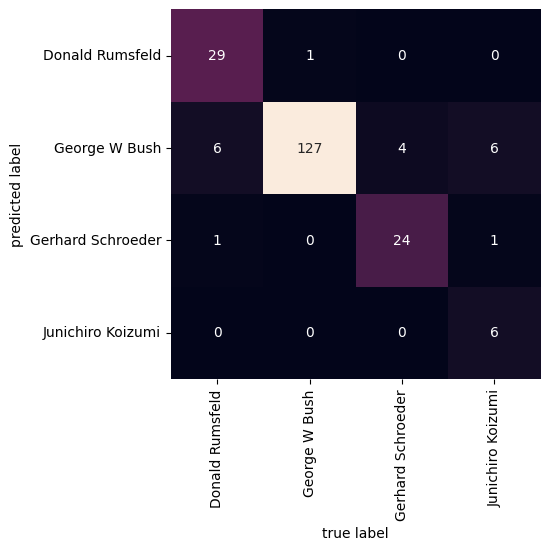

In [77]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Menunjukkan matriks kesalahsangkaan terkait dengan pelabelan foto satu dengan lainnya

<hr>

### **Praktikum 3 - Klasifikasi Naive Bayes dengan Data Dummy**

#### **Mendefinisikan Data Dummy**

In [78]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data firut X dan label y
# Label y akan berupa data yan sudah di encode (angka)
X, y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara default, make_classification menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutkan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[118  43]
 [ 11 323]
 [178  83]
 [189  80]
 [ 80 174]
 [103  99]
 [206 132]
 [176  87]
 [ 95  68]
 [178 202]
 [113 112]
 [ 47 242]
 [ 53 199]
 [160 124]
 [147  42]
 [142   5]
 [100  83]
 [ 49  71]
 [136  23]
 [204  67]
 [327  94]
 [135 229]
 [ 87  89]
 [ 27 182]
 [126 125]
 [215  73]
 [164   1]
 [137 154]
 [103 115]
 [218  12]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


Proses mendefinisikan data dummy dari class make_classification dengan jumlah samples diatur ke 30, jumlah feature 2, jumlah classes 2, jumlah informative 2, dan jumlah data redundan 2. Setelahnya data di ubah dari float ke bentuk diskrit dan diabsolutkan untuk menghindari nilai negatif. Data dibulatkan dan diubah ke tipe int

#### **(Opsional) Membuat Data Frame**

In [79]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y),1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()


,Fitur 1,Fitur 2,Label
0,118,43,0
1,11,323,0
2,178,83,0
3,189,80,0
4,80,174,0


Proses pembuatan data frame dengan cara mengubah y menjadi 2D lalu digabungkan dengan X serta mendefinisikan nama kolom

In [80]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,118,43,Kelas B
1,11,323,Kelas B
2,178,83,Kelas B
3,189,80,Kelas B
4,80,174,Kelas B


Proses encoding namun tidak menggunakan LabelEncoding

#### **(Opsional) Visualisasi Data**

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\382299331.py:11: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\382299331.py:12: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


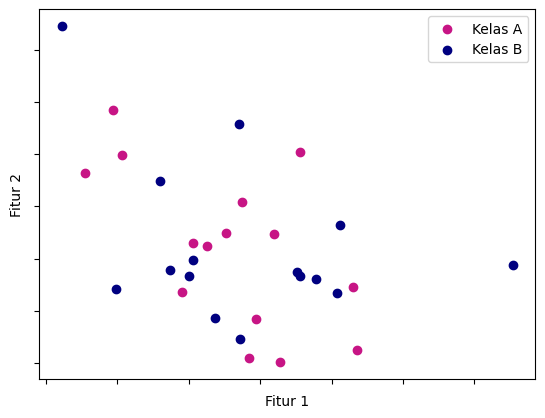

In [81]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a' : 'MediumVioletRed',
    'class_b' : 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Menunjukkan persebaran data dengan label Kelas A dan Kelas B

#### **Klasifikasi Multinomial Naive Bayes**

In [82]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi akurasi test
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6666666666666666
Hasil akurasi data test: 0.3333333333333333


Proses klasifikasi menggunakan Multinomial Naive Bayes, hasil akurasinya 57.14% untuk data train dan 44.44% untuk keakurasian prediksi menggunakan data test

#### **Klasifikasi Gaussian Naive Bayes**

In [83]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi dengan test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi akurasi test
acc_test = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train}')
print(f'Hasil akurasi data test (Gaussian): {acc_test}')

Hasil akurasi data train (Gaussian): 0.6190476190476191
Hasil akurasi data test (Gaussian): 0.2222222222222222


Proses klasifikasi menggunakan Gaussian Naive Bayes, hasilnya lebih akurat dibandingkan MNB (setidaknya untuk data dummy pada praktikum ini)

<hr>

### **Praktikum 4 - Klasifikas Naive Bayes pada Data Multinomial**

#### **Load Data**

In [84]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/spam.csv', encoding='latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Proses load data dari spam.csv dengan konversi encoding ke latin-1 karena encoding aslinya adalah utf-8

#### **Pra Pengolahan Data**

Beberapa hal yang akan dilakukan pada tahap ini yaitu,
1. Drop kolom yang tidak digunakan
2. Ubah nama kolom v1 (label) dan v2 (teks sms)
3. Inspeksi Data
4. Encoded label
5. Memisahkan fitur dengan label

#### **Drop Kolom**

In [85]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:, 2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Membuang kolom yang tidak dibutuhkan

#### **Ubah Nama Kolom V1 dan V2**

In [86]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1' : 'Labels',
    'v2' : 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# Cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Mengganti nama kolom dari v1 dan v2 menjadi Labels dan SMS

#### **Inspeksi Data**

In [87]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


Menunjukkan jumlah data dari masing-masing labels (spam dan ham), menunjukkan info terkait tipe data, jumlah data dari kolom, menunjukkan statistik deskriptif

#### **Encode Label**

In [88]:
# Data untuk label
new_labels = {
    'spam' : 1,
    'ham' : 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Proses encoding manual tanpa menggunakan LabelEncoder agar nanti datanya bisa displit menggunakan train_test_split

##### **Memisahkan Fitur dengan Label**

In [89]:
X = df['SMS'].values
y = df['Labels'].values

Menyimpan kolom SMS sebagai feature dan Labels sebagai target/label

#### **Ekstraksi fitur**

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui parameter yagn digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetao menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

Proses splitting data dengan rasio 8:2, proses fitting dan transform menggunakan CountVectorizer

In [91]:
print(bow.get_feature_names_out())
print(f'Dimensi data: {X_train.shape}')

['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']
Dimensi data: (4457, 7727)


Menampilkan semua featuer yang dihasilkan dari teks input dan menampilkan dimensi data training

#### **Training dan Evaluasi Model**

In [92]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi dengan data testing
y_test_pred = mnb.predict(X_test)

# Evaluasii akurasi data testing
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


Proses training data menggunakan MNB dan evaluasi data training serta data prediksi menggunakan class accuracy_score dari librari sklearn.metrics

<hr>

### **Praktikum 5 - Klasifikasi Citra Siang dan Malam**

#### **Langkah 0 - Import Library**

In [1]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

import library yang dibutuhkan

In [2]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

menyimpan data dari direktori images/training dan images/test ke masing-masing variabel

#### **Langkah 1 - Load Data dan Visualisasikan**

In [3]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))
    
    return img_list

function untuk memuat data dari direktori gambar sehingga gambarnya bisa diolah

In [4]:
# Load training data
train_img = load_dataset(train_dir)

memuat data dari train_dir untuk dijadikan data training

In [5]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [176, 209, 228],
         [177, 210, 229],
         [177, 210, 229]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [180, 213, 232],
         [180, 213, 232],
         [180, 213, 232]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [177, 210, 229],
         [177, 210, 229],
         [177, 210, 229]],
 
        ...,
 
        [[ 35,  40,  43],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 65,  73,  75],
         [ 65,  73,  75],
         [ 65,  73,  75]],
 
        [[ 36,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
         [ 68,  76,  78],
         [ 65,  73,  75]],
 
        [[ 36,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
  

pengecekan data training pertama

In [6]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 93
(469, 640, 3)


mengambil data random

In [119]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    
    if isinstance(label, str):
        if (label.find('day') != -1):
            label_str = 1
        else:
            label_str = 0
    else:
        if label == 1:
            label_str = 1
        else:
            label_str = 0

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')
    print(f'Label\t: {label_str}')

function untuk menampilkan detail gambar dan memberi label gambar berdasarkan asalny (contoh "images/training/day" maka labelnya akan bernilai 1)

Shape	: (555, 800, 3)
Label	: images\training\day
Label	: 1


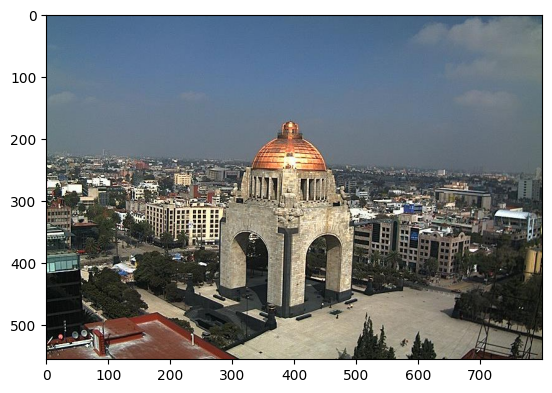

In [120]:
random_img_viz(train_img)

memunculkan gambar dan detailnya menggunakan function random_img_viz

#### **Langkah 3 - Pra Pengolahan Data**

In [121]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [124]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label.find('day') != -1):
        num_val = 1
    
    return num_val

In [125]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))
    
    return std_img_list

3 function di atas digunakan untuk mengolah data agar lebih mudah untuk diprediksi

In [126]:
train_std_img_list = preprocess(train_img)

tahap preprocessing data train_img

In [127]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 87
(600, 1100, 3)


mengambil data ranfom

Shape	: (600, 1100, 3)
Label	: 1
Label	: 1


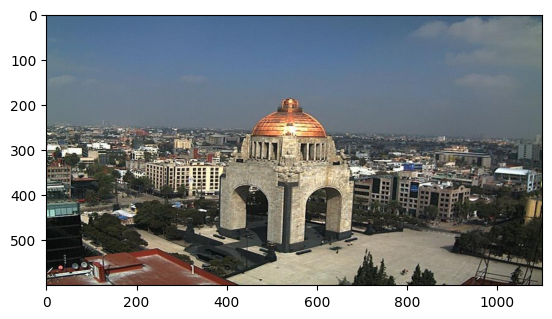

In [130]:
random_img_viz(train_std_img_list)

menampilkan data random dari variabel yang menyimpan data yang sudah di standarisasi

#### **Langkah 4 - Ekstraksi Fitur**

In [131]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert img to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rd value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

function untuk mengambil rata-rata brightness dari suatu gambar

Image 6
Avg Brightness: 112.1420


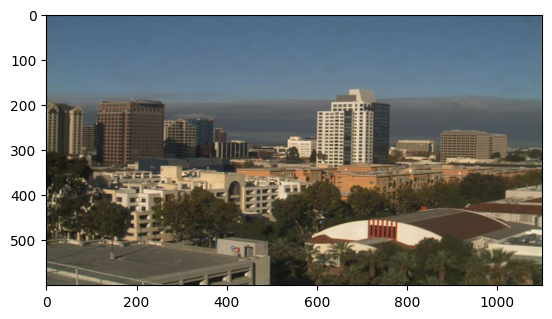

In [132]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brightness: {avg_img:.4f}')
plt.imshow(feature_img)

mengambil sebuah gambar random dan menghitung average brightnessnya menggunakan function avg_brightness

#### **Langkah 5 - Klasifikasi dengan Metode Threshold**

In [133]:
def predict_label(img, threshold):
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

function untuk memprediksi apakah gambar ini termasuk gambar siang atau malam berdasarkan threshold

Image 134
Actual label: 0
Prediced label: 0


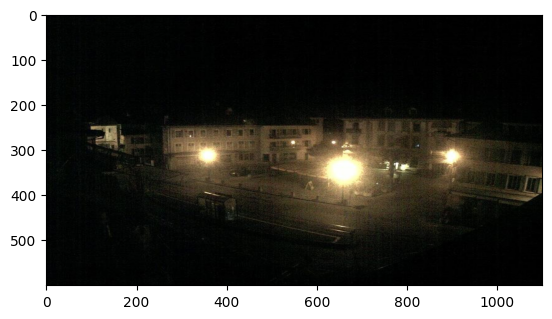

In [134]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Prediced label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

proses prediksi gambar siang atau malam dengan threshold brightness 120

#### **Langkah 6 - Evaluasi (Manual)**

In [135]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))
    
    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.3f}')

evaluasi prediksi

In [136]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.842


In [137]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.869


#### **Langkah 4 alternatif - Membuat Feature Vectors**

In [138]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)
    
    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

menghutung average brightness dan menjadikannya sebuah dataframe untuk diolah menggunakan SVM

In [139]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,175.092992,1.0
1,192.907867,1.0
2,132.133823,1.0
3,199.749191,1.0
4,109.947203,1.0


In [140]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,194.228062,1.0
1,157.826662,1.0
2,201.607444,1.0
3,191.237441,1.0
4,188.119652,1.0


#### **Langkah 5 alternatif**

In [141]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

proses instansiasi dan fitting model SVC

#### **Langkah 6 alternatif**

In [142]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


Proses prediksi dan penghitungan akurasi prediksi

<hr>

### **Tugas 1 (Opsional)**

1. **Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.**

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC

data = pd.read_csv('datasets/voice.csv')
data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [108]:
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

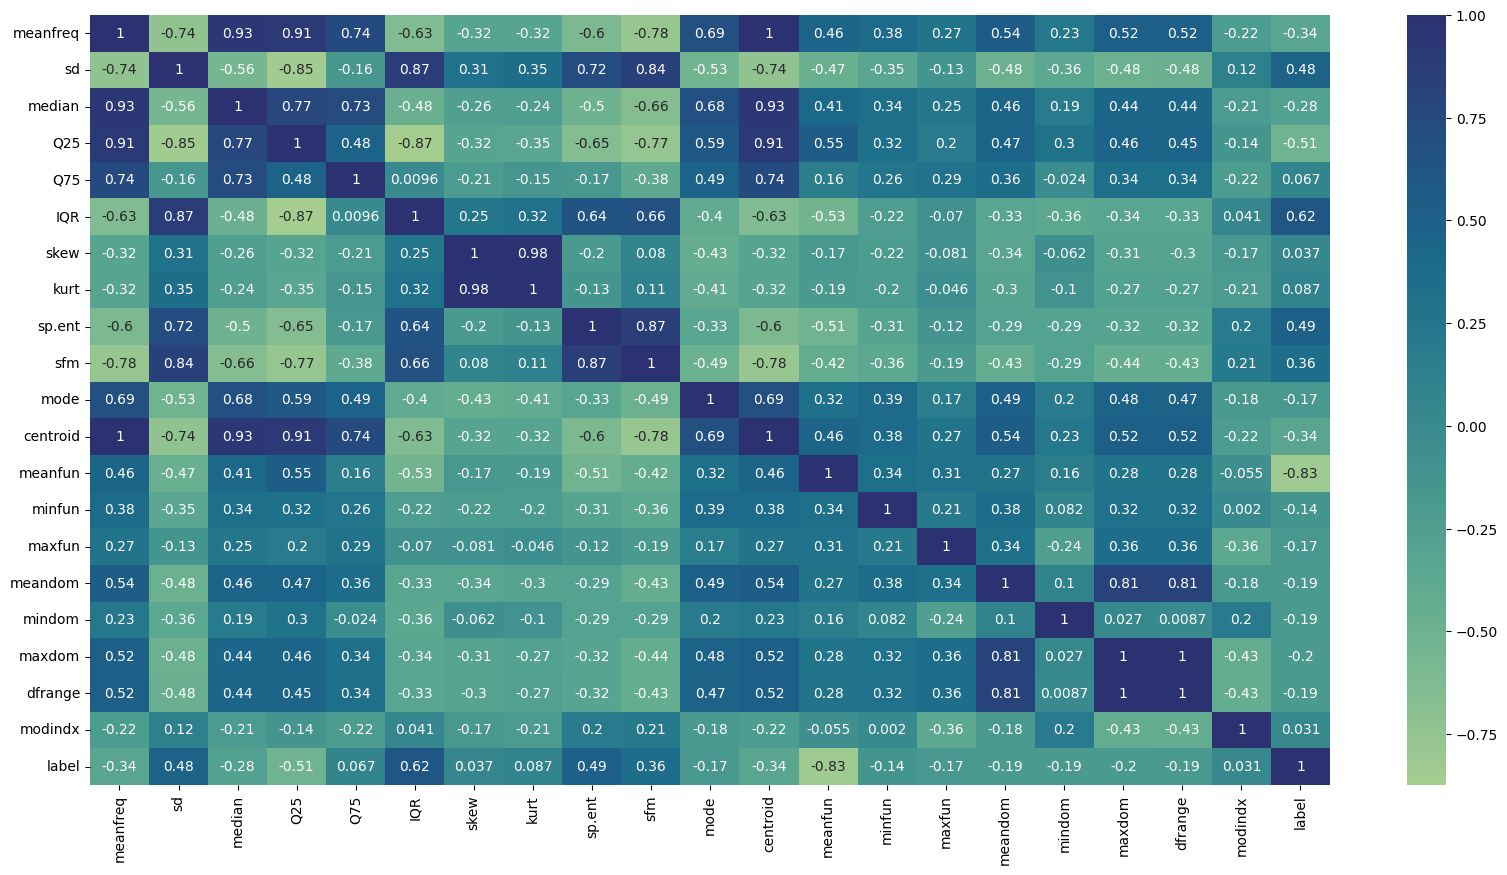

In [109]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cmap="crest", annot=True)
plt.show()

In [110]:
X = data.drop(columns='label')
y = data['label']

In [111]:
std = StandardScaler()

X = std.fit_transform(X)
X

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [113]:
model = SVC(kernel='rbf', C=100)
model.fit(X_train, y_train)

SVC(C=100)

In [114]:
from sklearn.metrics import accuracy_score

# Prediksi dengan data training
y_train_pred = model.predict(X_train)

# Evaluasi akurasi prediksi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi dengan data test
y_test_pred = model.predict(X_test)

# Evaluasi akurasi prediksi test
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train *100:.2f}%')
print(f'Hasil akurasi data test: {acc_test *100:.2f}%')

# Print laporan klasifikasi data test
print(f'Laporan klasifikasi data test\n {classification_report(y_test, y_test_pred)}')

Hasil akurasi data train: 99.96%
Hasil akurasi data test: 98.26%
Laporan klasifikasi data test
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       318
           1       0.98      0.99      0.98       316

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



<hr>

2. **Buatlah model klasifikasi Multinomial Naive Bayes dengan ketentuan,**
    1. Menggunakan data spam.csv
    2. Fitur CountVectorizer dengan mengaktifkan stop_words
    3. Evaluasi hasilnya

In [115]:
data = pd.read_csv('datasets/spam.csv', encoding='latin-1')
data = data.drop(data.iloc[:, 2:],axis=1)

new_cols = {
    'v1' : 'Labels',
    'v2' : 'SMS'
}
data = data.rename(columns=new_cols)

data.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [116]:
new_labels = {
    'spam' : 1,
    'ham' : 0
}

data['Labels'] = data['Labels'].map(new_labels)
data.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [117]:
X = data['SMS'].values
y = data['Labels'].values

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bow = CountVectorizer(stop_words='english')

X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_bow = mnb.predict(X_train)

# Hasil akurasi data training
acc_train_bow = accuracy_score(y_train, y_train_pred_bow)

# Prediksi dengan data test
y_test_pred_bow = mnb.predict(X_test)

# Hasil akurasi data test
acc_test_bow = accuracy_score(y_test, y_test_pred_bow)

# Laporan klasifikasi
report_bow = classification_report(y_test, y_test_pred_bow)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train_bow *100:.2f}%')
print(f'Hasil akurasi data test: {acc_test_bow *100:.2f}%')

Hasil akurasi data train: 99.46%
Hasil akurasi data test: 98.39%


<hr>

3. **Buatlah model klasifikasi Multinomial Naive Bayes dengan ketentuan,**
    1. Menggunakan spam.csv
    2. Fitur TF-IDF dengan mengaktifkan stop_words
    3. Evaluasi hasilnya dan badingkan dengan hasil pada Tugas no 2.
    4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tf_idf = TfidfVectorizer(stop_words='english')

X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_tf_idf = mnb.predict(X_train)

# Hasil akurasi data training
acc_train_tf_idf = accuracy_score(y_train, y_train_pred_tf_idf)

# Prediksi dengan data test
y_test_pred_tf_idf = mnb.predict(X_test)

# Hasil akurasi data test
acc_test_tf_idf = accuracy_score(y_test, y_test_pred_tf_idf)

# Laporan klasifikasi
report_tf_idf = classification_report(y_test, y_test_pred_tf_idf)

# Print perbandingan hasil evaluasi
print(f'Hasil akurasi data train menggunakan TF-IDF: {acc_train_tf_idf*100:.2f}%')
print(f'Hasil akurasi data train menggunakan CrossVectorizer: {acc_train_bow*100:.2f}%')
print(f'Hasil akurasi data test menggunakan TF-IDF: {acc_test_tf_idf*100:.2f}%')
print(f'Hasil akurasi data test menggunakan CrossVectorizer: {acc_test_bow*100:.2f}%')

# Print laporan klasifikasi data test
print('\n')
print(f'Laporan klasifikasi data test menggunakan TF-IDF\n {report_tf_idf}\n')
print(f'Laporan klasifikasi data test menggunakan CrossVectorizer\n {report_bow}')


Hasil akurasi data train menggunakan TF-IDF: 98.38%
Hasil akurasi data train menggunakan CrossVectorizer: 99.46%
Hasil akurasi data test menggunakan TF-IDF: 96.68%
Hasil akurasi data test menggunakan CrossVectorizer: 98.39%


Laporan klasifikasi data test menggunakan TF-IDF
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Laporan klasifikasi data test menggunakan CrossVectorizer
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



**Kesimpulan**

Fitur yang terbaik untuk mengolah data spam.csv adalah fitur CrossVectorizer. Kesimpulan ini bisa dibuktikan dengan melihat perbandingan akurasi, precision, recall, dan f1-score antara TF-IDF dengan CrossVectorizer. Oleh karena itu, CrossVectorizer dapat dinyatakan sebagai fitur terbaik untuk mengolah data spam.csv.

<hr>

### **Tugas 2**

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data Percobaan 5 dengan menggunakan **fitur histogram**.

#### **Langkah 0 - Import Library**

In [186]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [187]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

#### **Langkah 1 - Load Data dan Visualisasikan**

In [188]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))
    
    return img_list

In [189]:
# Load training data
train_img = load_dataset(train_dir)

In [190]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    
    if isinstance(label, str):
        if (label.find('day') != -1):
            label_str = 1
        else:
            label_str = 0
    else:
        if label == 1:
            label_str = 1
        else:
            label_str = 0

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')
    print(f'Label Str\t: {label_str}')

Shape	: (555, 800, 3)
Label	: images\training\night
Label Str	: 0


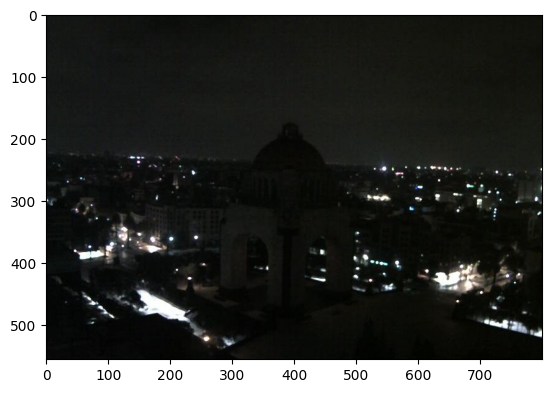

In [191]:
random_img_viz(train_img)

#### **Langkah 3 - Pra Pengolahan Data**

In [192]:
def standarized_input(image):
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [193]:
def label_encoder(label):
    num_val = 0

    if (label.find('day') != -1):
        num_val = 1
    
    return num_val

In [194]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))
    
    return std_img_list

In [195]:
train_std_img_list = preprocess(train_img)

Shape	: (600, 1100, 3)
Label	: 0
Label Str	: 0


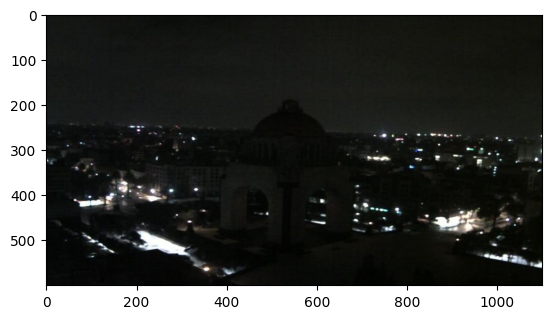

In [196]:
random_img_viz(train_std_img_list)

#### **Langkah 4 - Membuat Feature Vectors**

In [203]:
def get_rgb_histogram(image):
    rand_num = np.random.randint(0, len(image))
    chans = cv2.split(image[rand_num])  # Pisahkan gambar menjadi channel B, G, dan R
    hist_features = []
    
    # Menghitung histogram untuk setiap channel (B, G, R)
    for chan in chans:
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        hist = hist.flatten() / hist.sum()  # Normalisasi histogram
        hist_features.extend(hist)  # Menggabungkan semua channel
    
    return hist_features

In [241]:
def plot_rgb_histogram(image, title="RGB Histogram"):
    if isinstance(image, list):
        # If it's a list, randomly select one image
        rand_num = np.random.randint(0, len(image))
        image = image[rand_num][0]  # Assuming image is at index 0 of the tuple
    
    chans = cv2.split(image)
    colors = ('b', 'g', 'r')
    plt.figure(figsize=(10, 5))
    plt.title(title)
    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.show()


In [242]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    labels = []
    hist_list = []

    for img in img_list:
        img_label = img[1] # Get the image label
        img_hist = get_rgb_histogram(img[0])

        labels.append(img_label)
        hist_list.append(img_hist)
    
    # Create a Pandas dataframe
    df = pd.DataFrame(hist_list)
    df['LABELS'] = labels

    return df

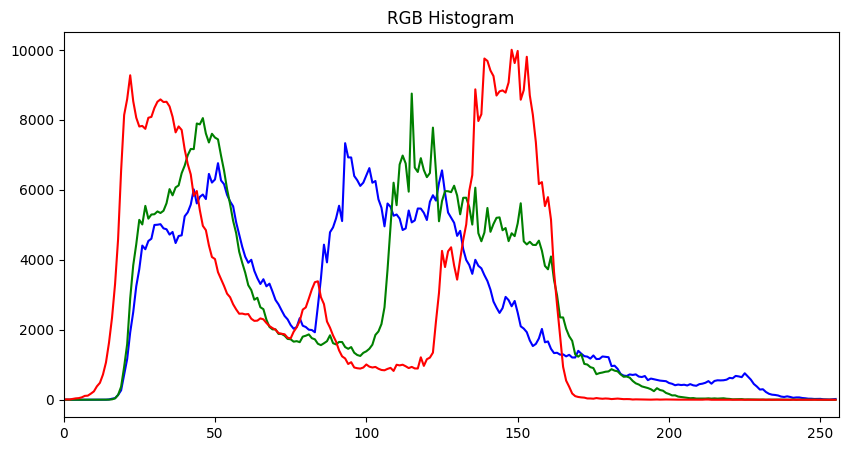

Shape: (240, 257)


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,LABELS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [243]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
plot_rgb_histogram(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

#### **Langkah 5 - Klasifikasi dengan SVM**

In [244]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X = train_avg_img.drop('LABELS', axis=1)
y = train_avg_img['LABELS']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [250]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

model_svc = SVC(kernel='rbf')

model_svc.fit(X_train_std, y_train)

y_pred_train = model_svc.predict(X_train_std)
y_pred_test = model_svc.predict(X_test_std)

acc_train_svc = accuracy_score(y_train, y_pred_train)
acc_test_svc = accuracy_score(y_test, y_pred_test)

print(f"Accuracy test: {acc_train_svc*100:.2f}%")
print(f"Accuracy test: {acc_test_svc*100:.2f}%")

Accuracy test: 88.54%
Accuracy test: 81.25%
